
Epoch 1/10


Training: 100%|██████████| 14/14 [01:02<00:00,  4.47s/it]


Train Loss: 0.6936


Evaluating: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


Val Loss: 0.6676
Val Accuracy: 61.07%

Epoch 2/10


Training: 100%|██████████| 14/14 [01:06<00:00,  4.73s/it]


Train Loss: 0.6440


Evaluating: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


Val Loss: 0.6577
Val Accuracy: 61.07%

Epoch 3/10


Training: 100%|██████████| 14/14 [01:04<00:00,  4.62s/it]


Train Loss: 0.5802


Evaluating: 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


Val Loss: 0.6495
Val Accuracy: 61.07%

Epoch 4/10


Training: 100%|██████████| 14/14 [01:09<00:00,  4.97s/it]


Train Loss: 0.4756


Evaluating: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


Val Loss: 0.6506
Val Accuracy: 63.09%

Epoch 5/10


Training: 100%|██████████| 14/14 [01:07<00:00,  4.83s/it]


Train Loss: 0.3128


Evaluating: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


Val Loss: 0.7171
Val Accuracy: 62.42%

Epoch 6/10


Training: 100%|██████████| 14/14 [01:08<00:00,  4.86s/it]


Train Loss: 0.1636


Evaluating: 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


Val Loss: 0.9261
Val Accuracy: 51.01%

Epoch 7/10


Training: 100%|██████████| 14/14 [01:07<00:00,  4.85s/it]


Train Loss: 0.0701


Evaluating: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


Val Loss: 0.9187
Val Accuracy: 61.74%

Epoch 8/10


Training: 100%|██████████| 14/14 [01:07<00:00,  4.82s/it]


Train Loss: 0.0345


Evaluating: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


Val Loss: 0.9675
Val Accuracy: 65.10%

Epoch 9/10


Training: 100%|██████████| 14/14 [01:12<00:00,  5.16s/it]


Train Loss: 0.0242


Evaluating: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Val Loss: 1.1125
Val Accuracy: 57.72%

Epoch 10/10


Training: 100%|██████████| 14/14 [01:13<00:00,  5.22s/it]


Train Loss: 0.0196


Evaluating: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]

Val Loss: 1.2888
Val Accuracy: 60.40%


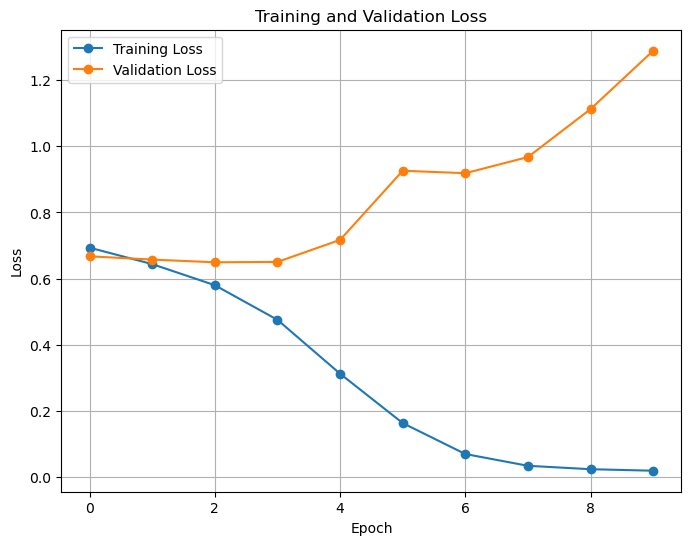

In [2]:
import torch
from torch.utils.data import DataLoader as TorchDataLoader

from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.loading_data.dataloader import DataLoader
from DL_vs_HateSpeech.training.training import (
    collate_fn,
    get_optimizer_and_criterion,
    train_epoch
)
from DL_vs_HateSpeech.evaluation.evaluate import evaluate
from DL_vs_HateSpeech.plots.plot_loss import plot_losses

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
BATCH_SIZE = 32
LR = 1e-5
EPOCHS = 10

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Initialize Model, Optimizer, Loss
model = ModelV0(clip_model_type="32").to(device)
optimizer, criterion = get_optimizer_and_criterion(model, lr=LR)

# Training and evaluation loop
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")

    # Train
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    print(f"Train Loss: {train_loss:.4f}")
    train_losses.append(train_loss)

    # Evaluation loss and accuracy
    val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
    print(f"Val Loss: {val_loss:.4f}")
    print(f"Val Accuracy: {val_accuracy * 100:.2f}%")
    val_losses.append(val_loss)

# Plot at the end
plot_losses(train_losses, val_losses)
